#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Imports

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB

#### Data Observation

The Heart Disease data set  is all numerical so it does not need any encoding to be applied.

In [47]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Integrety
The Data set has no null/NaN value so there is no need for data preparation.

In [48]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Data Observation
The total number of columns are 14 and Rows are 303

In [49]:
len(df.columns), len(df)

(14, 303)

In [50]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Preparation

Splitting the data into `target` and `feature` varables

In [51]:
# Feature varables
X = df.drop("output", axis=1)

# Target Varaible
y = df["output"]

#### Data Balance

Checking if the target variable data is balanced using feature varables

In [52]:
# Number of target varable types
target_count = y.value_counts()
print(target_count)


1    165
0    138
Name: output, dtype: int64


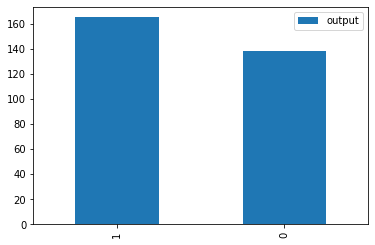

In [53]:
plot_values = pd.DataFrame(target_count)
plot_values.plot.bar();

#### Model selection

We will run the set of models through 100 Monte Carlo runs and check accuracy to determine which of the models are best suited for our data set.

In [54]:
clfs = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC(probability=True, kernel='linear'),
    "GNB" : GaussianNB()
}

#### Model testing impelementaion

Using the method below we can get the accuracy for all the above models, ensamble methods are also implemented to check through the runs. 

In [55]:
# Method to Run Iterations

# Data Collection for each run of the method

# Accuracy of each model 
clf_acc = {}

# CV Scores for Ensamble methods
clf_cv_scores = {}

# Store of trained models to use to predict if needed
clf_store = {}

# Test values used to evaluate each models to use for plotting and further evaluation
clf_y_test = {}

# Predicted value for each model to be used for further plotting and evaluation
clf_y_preds = {}

# Method to run all the models provided on the data set
def run_clfs(X, y , split_size, mc_run_limit, ens_bg_clf = False, ens_bo_clf = False, ens_st_clf = False, n_est = 1, cv_val = None, base_learners = None, final_estimator = None):
    
    # Running though all models/Classifiers 
    for key in clfs:
        # For 100 Monte Carlo runs
        for i in range(mc_run_limit):

                # Selecting each classifiers
                clf = clfs[key]

                # Preparing data by slitting it into training and testing data
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_size)

                # If bagging 
                if ens_bg_clf:
                    model = BaggingClassifier(base_estimator = clf, n_estimators = n_est, max_samples = 0.8, max_features= 0.8)
                    dt = model.fit(X_train,y_train)
                
                # If boosting
                elif ens_bo_clf:
                    model = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)
                    dt = model.fit(X_train,y_train)

                # If stacking
                elif ens_st_clf:
                    model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv = cv_val)
                    dt = model.fit(X_train,y_train)

                # Or normal models
                else:    
                    dt = clf.fit(X_train,y_train)

                # Predited values on test set
                y_preds = dt.predict(X_test) 

                # actual values
                actual = y_test

                # Predicted value
                predicted = y_preds

                # Accuracy Score
                accuracy = accuracy_score(actual, predicted)

                # If ensamble is used the CV scores are required for BoxPlot
                if (ens_bg_clf or ens_bo_clf or ens_st_clf):
                    cv_scores = cross_val_score(dt, X, y, scoring='accuracy', cv = cv_val, error_score='raise')
                else:
                    cv_scores = {}
        
        # Filling data 
        clf_acc[key] = accuracy
        clf_cv_scores[key] = cv_scores 
        clf_store[key] = dt
        clf_y_test[key] = y_test
        clf_y_preds[key] = y_preds

### Part 1
 Running the Models for varying value of test set, in this case 20% and 50 %

#### Monte carlo runs with 20% Test data

In [56]:
# Training size 20%, MC runs 100

run_clfs(X, y, 0.2, 100)

#### Check the accuracy of the models

In [57]:
pd.DataFrame([clf_acc])

,RF,DT,SVC,GNB
0,0.814815,0.728395,0.814815,0.765432


#### Conclusion for 20 percent data as test.

As observed above Random forrest performs best with 20 percent data as test on 100 MC runs,
The confustion matrix below will give some clear visual idea.


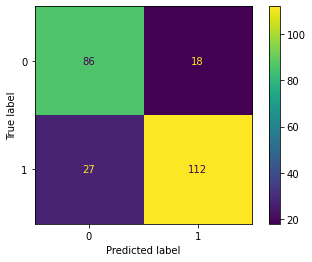

In [58]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

#### Summary using Classification report for 20% test data

In [59]:
print(classification_report(clf_y_test["RF"], clf_y_preds["RF"]))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       104
           1       0.86      0.81      0.83       139

    accuracy                           0.81       243
   macro avg       0.81      0.82      0.81       243
weighted avg       0.82      0.81      0.82       243



#### Monte carlo runs with 50% Test data

In [60]:
# Training size 50%, MC runs 100
run_clfs(X, y, 0.5, 100)

#### Check the accuracy of the models

In [61]:
pd.DataFrame([clf_acc])

,RF,DT,SVC,GNB
0,0.769737,0.703947,0.769737,0.822368


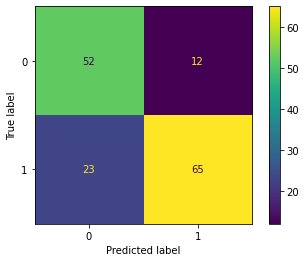

In [62]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

#### Summary using Classification report for 50% test data

In [63]:
print(classification_report(clf_y_test["RF"], clf_y_preds["RF"]))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        64
           1       0.84      0.74      0.79        88

    accuracy                           0.77       152
   macro avg       0.77      0.78      0.77       152
weighted avg       0.78      0.77      0.77       152



### Part 2 - Ensamble methods

Using Ensamble methods run 100 monte carlo runs to determine which ensamble works best with which model

In [64]:
# Ensamble Bagging for 100 MC runs
run_clfs(X, y, 0.2, 100, ens_bg_clf=True)

In [65]:
pd.DataFrame([clf_acc])

,RF,DT,SVC,GNB
0,0.753086,0.740741,0.670782,0.781893


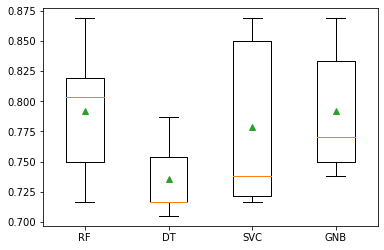

In [66]:
plt.boxplot(clf_cv_scores.values(), labels = clf_cv_scores.keys(), showmeans = True);

In [67]:
# Ensamble Boosting for 100 MC runs
run_clfs(X, y, 0.2, 100, ens_bo_clf= True)

In [68]:
pd.DataFrame([clf_acc])

,RF,DT,SVC,GNB
0,0.773663,0.711934,0.757202,0.777778


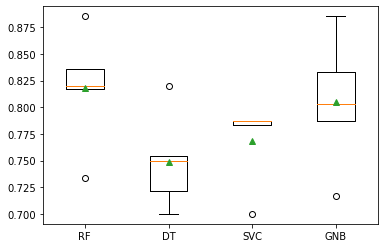

In [69]:
plt.boxplot(clf_cv_scores.values(), labels = clf_cv_scores.keys(), showmeans = True);

In [70]:
base_learners = [
                 ('cf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('cf_2', DecisionTreeClassifier()),             
                 ('cf_3', SVC())             
                ]
final_estimator = LogisticRegression()

In [71]:
run_clfs(X, y, 0.2, 100, ens_st_clf = True, cv_val = 5, base_learners = base_learners, final_estimator = final_estimator)

In [72]:
pd.DataFrame([clf_acc])

,RF,DT,SVC,GNB
0,0.683128,0.753086,0.703704,0.728395


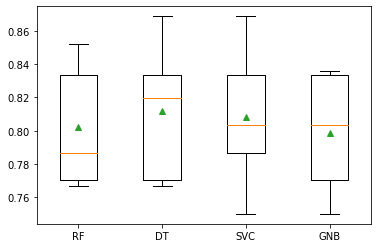

In [73]:
plt.boxplot(clf_cv_scores.values(), labels = clf_cv_scores.keys(), showmeans = True);